Ejercicios sobre interpolación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

Ejercicio 1:
Para este ejercicio, el grado mayor del polinomio que se pide es 4 ya que se tienen 5 datos.

x**2


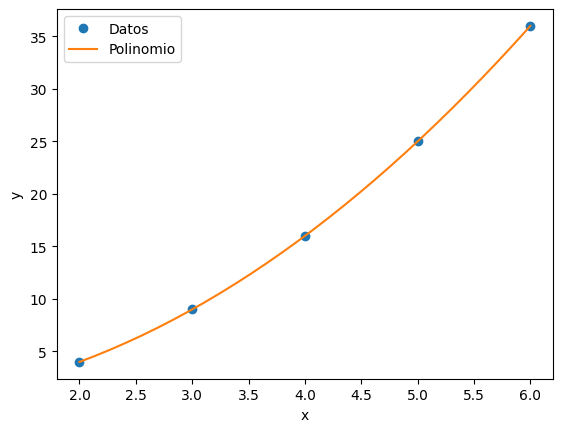

In [ ]:
# funcion = input(' ')
# func = lambda x: x**2
x1 = np.array([2, 3, 4, 5, 6])
y1 = np.array([2, 6, 5, 5, 5]) # evaluar la función
L = 1 # para los coeficientes de lagrange
x = 0.3 # punto de interpolación

def lagrange(dataxs, datays, L, x):
    val = 0
    n = len(dataxs)
    x = sym.Symbol('x')
    polinomio = 0
    for k in range(n):
        L = 1
        for j in range(n):
            if j == k:
                continue
            L *= (x - dataxs[j]) / (dataxs[k] - dataxs[j]) # puntos cardinales de Lagrange
        polinomio += datays[k] * L # fórmula de interpolación

    polisimple = polinomio.expand().evalf()

    # para evaluación numérica
    px = sym.lambdify(x, polisimple)

    return px, polisimple

px, polisimple = lagrange(x1, y1, L, x)
px, polisimple
print(polisimple)

# Gráfica
xi = np.linspace(2, 6, 30)

plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Comparando este resultado con np.polyfit, la cual es una función de numpy que acepa tres valores de entrada diferentes: x, y y el grado polinómico.

In [ ]:
x = np.array([2, 3, 4, 5, 6])
y = np.array([2, 6, 5, 5, 5])

poli = np.polyfit(x, y, 4) # grado del polinomio es igual a cuatro
a0 = poli[0]
a1 = poli[1]
a2 = poli[2]
a3 = poli[3]
eq = a0*np.power(x, 4) + a1*np.power(x, 3) + a2*np.square(x) + a3
eq

array([  -5.41666667,  -88.83333333, -177.25      , -264.66666667,
       -352.08333333])

**Ejercicio 2**

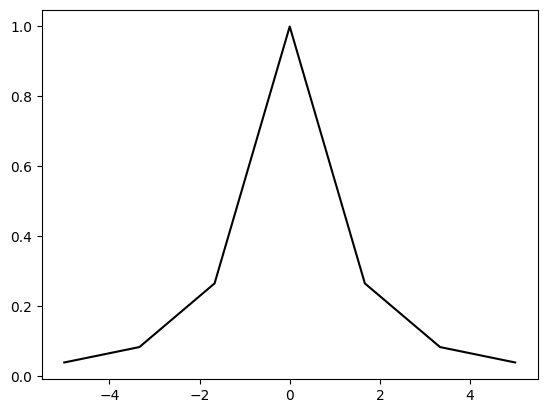

In [ ]:
# a)
# Generar un juego de datos de datos en el intervalo [-5, 5] equiespaciados y graficarlo
f = lambda x: 1 / (1 + x**2)
x = np.linspace(-5, 5, 7)
y = f(x)

plt.plot(x, y, 'k')


b) Analizando la figura, ¿qué método de interpolación usarías polinomial (Lagrange, Newton) o de trazados (lineal, splines)?

0.026464361326746653x +0.17078334509527174/ para x en [-5.0, -3.333333333333333]
0.10928224500809502x +0.4468429573664329/ para x en [-3.333333333333333, -1.6666666666666665]
0.4411764705882353x +1.0/ para x en [-1.6666666666666665, 0.0]
-0.4411764705882352x +1.0/ para x en [0.0, 1.666666666666667]
-0.10928224500809494x +0.44684295736643276/ para x en [1.666666666666667, 3.333333333333334]
-0.026464361326746642x +0.17078334509527165/ para x en [3.333333333333334, 5.0]


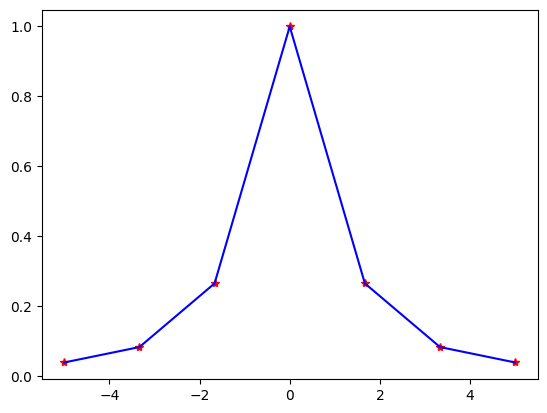

In [ ]:
# El spline lineal
def splinelineal(x, y):
    n = len(x) # número de datos
    for k in range(n - 1): # realizar procedimiento hasta el penúltimo punto
        # pendiente que une a esos puntos
        # partiendo de y - mx = b
        m = (y[k + 1] - y[k])/(x[k + 1] - x[k])
        b = y[k] - m*x[k]
        # ecuaciones de la recta
        if (b > 0):
            print(m, 'x +', b, sep= '', end = '') # m multiplicado por x más el valor de b, separador entre cádenas de caracteres nulo,
            # sin separador en los prints
        elif (b < 0):
            print(m, 'x-', abs(b), sep= '', end = '') # mx menos valor absoluto de b
        else:
            print(m, 'x/t', sep='', end='') # no hay b, m*x

        print('/ para x en [', x[k], ', ', x[k + 1], ']', sep='')

    plt.plot(x, y, '*r', x, y, 'b') # x y en el plano color rojo, segmentos de recta

f = lambda x: 1 / (1 + x**2)
x = np.linspace(-5, 5, 7)
y = f(x)
splinelineal(x, y)

c) ¿Qué metodo de interpolación sería el correcto a usar? Justifique su resultado graficándolo. *La interpolación de Lagrange sería el mejor pues se trata de un intervalo muy pequeño*

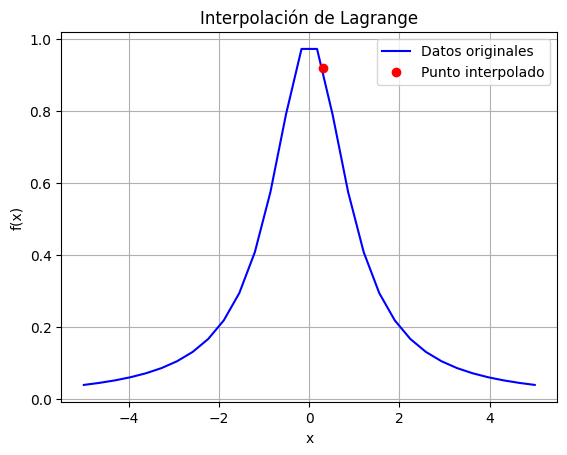

0.3
0.9174311926605504
0.9177727552587721


In [17]:
func = lambda x: 1/(1 + x**2)
dataxs = np.linspace(-5, 5, 30) # se crea un arreglo con 15 puntos equidistantes de -1, 1
datays = func(dataxs) # evaluar la función
L = 1 # para los coeficientes de lagrange
x = 0.3 # punto de interpolación

def lagrange(dataxs, datays, L, x):
    val = 0
    n = len(dataxs)
    for k in range(n):
        L = 1
        for j in range(n):
            if j == k:
                continue
            L *= (x - dataxs[j]) / (dataxs[k] - dataxs[j]) # puntos cardinales de Lagrange
        val += datays[k] * L # fórmula de interpolación
    return val

y_interp = lagrange(dataxs, datays, L, x)

plt.plot(dataxs, datays, 'b', label='Datos originales')
plt.plot(x, y_interp, 'ro', label='Punto interpolado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Lagrange')
plt.legend()
plt.grid(True)
plt.show()

print(x) # valor de la interpolación
print(func(x)) #función evaluada
print(y_interp) # Valor interpolado en el punto

**Ejercicio 3**

a) Aplicar una interpolación polinomial y aproximar el valor de f(2.4) usando un polinomio de grado 2

3.3201169227365472


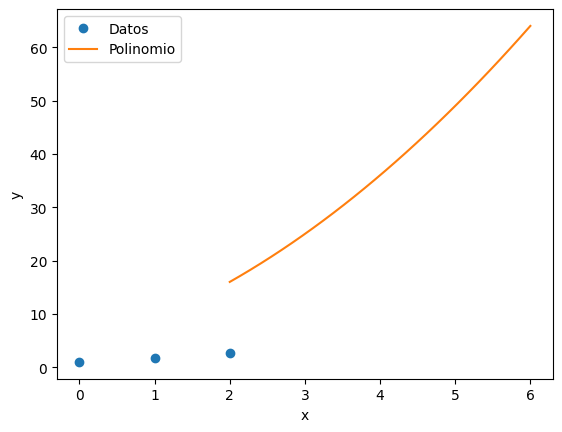

In [ ]:
#func = lambda x: np.exp**(0.5*x)
#x1 = np.array([0, 1, 2])
#y1 = func(x1) # evaluar la función
#L = 1 # para los coeficientes de lagrange
#x = 0.3 # punto de interpolación
# print polinomio(2.4)

def lagrange(dataxs, datays, L, x):
    val = 0
    n = len(dataxs)
    x = sym.Symbol('x')
    polinomio = 0
    for k in range(n):
        L = 1
        for j in range(n):
            if j == k:
                continue
            L *= (x - dataxs[j]) / (dataxs[k] - dataxs[j]) # puntos cardinales de Lagrange
        polinomio += datays[k] * L # fórmula de interpolación

    polisimple = polinomio.expand().evalf()

    # para evaluación numérica
    px = sym.lambdify(x, polisimple)

    return px, polisimple

px, polisimple = lagrange(x1, y1, L, x)
px, polisimple
func = lambda x: np.exp(0.5*x)
x1 = np.array([0, 1, 2])
y1 = func(x1) # evaluar la función
print(func(2.4))
xi = np.linspace(2, 6, 30)

# Gráfica
plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

b) Aplique la interpolación polinomial y aproxime el valor f(2.4) usando un polinomio que sea del mayor grado posible.

<function _lambdifygenerated at 0x7b2f0f26bac0> 0.00737940439717288*x**4 + 0.00122480646051404*x**3 + 0.155089393367641*x**2 + 0.485027666474799*x + 1.0
3.3191439571749184
2.340406377445774


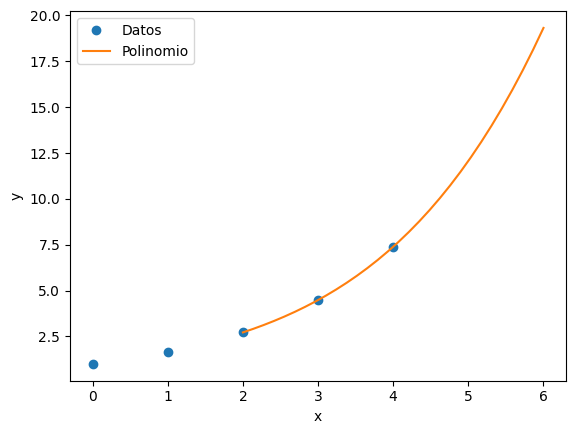

In [14]:
func = lambda x: np.exp(0.5*x)
x1 = np.array([0, 1, 2, 3, 4])
y1 = func(x1) # evaluar la función

def lagrange(dataxs, datays, L, x):
    val = 0
    n = len(dataxs)
    x = sym.Symbol('x')
    polinomio = 0
    for k in range(n):
        L = 1
        for j in range(n):
            if j == k:
                continue
            L *= (x - dataxs[j]) / (dataxs[k] - dataxs[j]) # puntos cardinales de Lagrange
        polinomio += datays[k] * L # fórmula de interpolación

    polisimple = polinomio.expand().evalf()

    # para evaluación numérica
    px = sym.lambdify(x, polisimple)

    return px, polisimple

px, polisimple = lagrange(x1, y1, L, x)
print(px, polisimple)
print(px(2.4))
print(px(1.7))

xi = np.linspace(2, 6, 30)

# Gráfica
plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

c) Encuentre una cota superior para el error absoluto y relativo de interpolación en la aproximación de
 para cada caso.

In [15]:
# Error absoluto = comparar el resultado analítico menos el de la interpolación.
# Error relativo = resultado analítico menos el de la interpolación entre el análitico ---> resultado analítico = interpolación de f(2.4)

# Polinimio de grado 2:
def lagrange(dataxs, datays, L, x):
    val = 0
    n = len(dataxs)
    x = sym.Symbol('x')
    polinomio = 0
    for k in range(n):
        L = 1
        for j in range(n):
            if j == k:
                continue
            L *= (x - dataxs[j]) / (dataxs[k] - dataxs[j]) # puntos cardinales de Lagrange
        polinomio += datays[k] * L # fórmula de interpolación

    polisimple = polinomio.expand().evalf()

    # para evaluación numérica
    px = sym.lambdify(x, polisimple)

    return px, polisimple
L=1
func = lambda x: np.exp(0.5*x)
x1 = np.array([0, 1, 2])
y1 = func(x1) # evaluar la función
px, polisimple = lagrange(x1, y1, L, x)
px, polisimple
print('Error absoluto: ',abs(func(2.4) - func(1.7)))
print('Error relativo: ', (func(2.4) - func(1.7))/func(2.4))

Error absoluto:  0.9804700708105565
Error relativo:  0.29531191028128656


**Ejercicio 4**
a) ¿Qué método de interpolación usaría? *El trignométrico porque me dan número de nodos y un intervalo.*


b) Realice la interpolación mediante el método escogido

0.3 2.245699366201992
2.7931880230409885


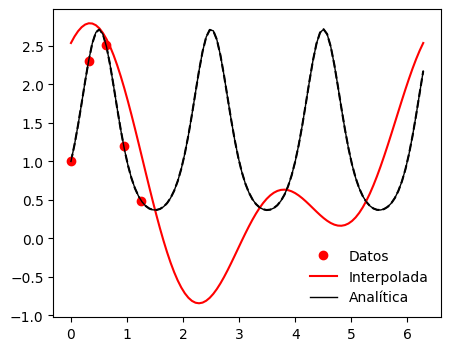

In [2]:
def computeparams(dataxs, datays):
    n = dataxs.size
    m = (n + 1) // 2 if n % 2 == 0 else n // 2 + 1 # adaptación para casos pares e impares
    ak = np.zeros(m)  # Inicialización de los coeficientes ak
    bk = np.zeros(m - 1)  # Inicialización de los coeficientes bk

    for k in range(m):
        ak[k] = np.dot(datays, np.cos(k * dataxs)) / n
    for k in range(1, m -1):
        bk[k] = np.dot(datays, np.sin(k * dataxs)) / n

    return ak, bk

def triginterp(aparams, bparams, x):
    n = aparams.size + bparams.size
    m = n // 2
    val = 0.5 * aparams[0]  # Término constante a0
    if n % 2 == 0:  # Caso par
        val += 0.5 * aparams[-1] * np.cos(m * x)  # Término de más alto grado am / 2
        for k in range(1, m):  # Términos de coseno
            val += aparams[k] * np.cos(k * x)
            val += bparams[k - 1] * np.sin(k * x)

    else:  # Caso impar
        for k in range(1, m + 1):  # Términos de coseno
            val += aparams[k] * np.cos(k * x)
            val += bparams[k - 1] * np.sin(k * x)

    return val

def generatedata(n, f, nodes="cheb", int=[-1, 1], endpoint=True):
    if nodes=="cheb": # NODOS
        dataxs = -np.cos(np.linspace(0, np.pi, n)) # fórmula para generar los nodos de chebyshev
    else:
        dataxs = np.linspace(int[0], int[1], n, endpoint=endpoint) # si no, generar nodos equiespaciados
        datays = f(dataxs) # evaluar estos nodos en f para obtener los valores de datays
    return dataxs, datays

# ejemplo

func = lambda x: np.exp(np.sin(np.pi*x)) # función a evaluar
n = 5 # nodos
dataxs, datays = generatedata(n, func, nodes=" ", int=[0, 0.5*np.pi], endpoint=False) ## datos, donde se encuentra el intervalo pedido
aparams, bparams = computeparams(dataxs, datays)
x = 0.3
pofx = triginterp(aparams, bparams, x)
print(x, func(x))
print(pofx)

# Gráfica
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure(figsize = (5,4))
plt.plot(x, func(x), 'k--')
daty = [triginterp(aparams, bparams, i) for i in x]

plt.plot(dataxs, datays, 'ro', label='Datos')
plt.plot(x, daty, c='r', label='Interpolada')
plt.plot(x, func(x), c='k', ls='-', lw=1, label='Analítica')
plt.legend(frameon=False)

c) Integrar la función interpolada utilizando algún método numérico.
*Utilizando el método de Gauss Legendre,*

In [3]:
func = lambda x: np.sin(np.pi*x)
a = 0
b = np.pi*0.5

x = np.array([np.sqrt(1/3), -np.sqrt(1/3)]) #valor de los nodos x_i
w = np.array([1, 1]) #pesos

#cambio de variable
u = (b-a)*x/2 + (a + b)/2

#hacer la evaluación
integral = (b - a) * np.sum(w*func(u))/2
print(integral)

0.14289316218504042


d) ¿Cuál sería la ventaja si se tuviera el intervalo [0, 2pi]?
*La ventaja sería que podríamos usar la implementación par del código*
e) Compare ambas implementaciones. *Aplicándole este intervalo al mismo programa,*

0.3 2.245699366201992
0.5798503420189399


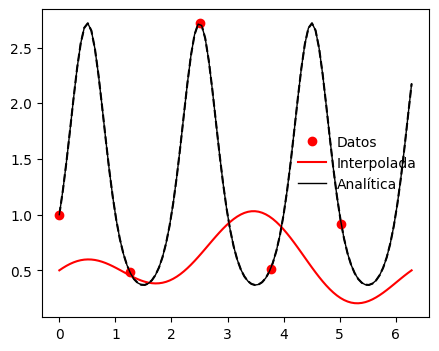

In [16]:
def computeparams(dataxs, datays):
    n = dataxs.size
    m = (n + 1) // 2 if n % 2 == 0 else n // 2 + 1 # adaptación para casos pares e impares
    ak = np.zeros(m)  # Inicialización de los coeficientes ak
    bk = np.zeros(m - 1)  # Inicialización de los coeficientes bk

    for k in range(m):
        ak[k] = np.dot(datays, np.cos(k * dataxs)) / n
    for k in range(1, m -1):
        bk[k] = np.dot(datays, np.sin(k * dataxs)) / n

    return ak, bk

def triginterp(aparams, bparams, x):
    n = aparams.size + bparams.size
    m = n // 2
    val = 0.5 * aparams[0]  # Término constante a0
    if n % 2 == 0:  # Caso par
        val += 0.5 * aparams[-1] * np.cos(m * x)  # Término de más alto grado am / 2
        for k in range(1, m):  # Términos de coseno
            val += aparams[k] * np.cos(k * x)
            val += bparams[k - 1] * np.sin(k * x)

    else:  # Caso impar
        for k in range(1, m + 1):  # Términos de coseno
            val += aparams[k] * np.cos(k * x)
            val += bparams[k - 1] * np.sin(k * x)

    return val

def generatedata(n, f, nodes="cheb", int=[-1, 1], endpoint=True):
    if nodes=="cheb": # NODOS
        dataxs = -np.cos(np.linspace(0, np.pi, n)) # fórmula para generar los nodos de chebyshev
    else:
        dataxs = np.linspace(int[0], int[1], n, endpoint=endpoint) # si no, generar nodos equiespaciados
        datays = f(dataxs) # evaluar estos nodos en f para obtener los valores de datays
    return dataxs, datays

# ejemplo

func = lambda x: np.exp(np.sin(np.pi*x)) # función a evaluar
n = 5 # nodos
dataxs, datays = generatedata(n, func, nodes=" ", int=[0, 2*np.pi], endpoint=False) ## datos, donde se encuentra el intervalo pedido
aparams, bparams = computeparams(dataxs, datays)
x = 0.3
pofx = triginterp(aparams, bparams, x)
print(x, func(x))
print(pofx)

# Gráfica
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure(figsize = (5,4))
plt.plot(x, func(x), 'k--')
daty = [triginterp(aparams, bparams, i) for i in x]

plt.plot(dataxs, datays, 'ro', label='Datos')
plt.plot(x, daty, c='r', label='Interpolada')
plt.plot(x, func(x), c='k', ls='-', lw=1, label='Analítica')
plt.legend(frameon=False)

**Ejercicio 5**
a) ¿Qué método de interpolación usaría? *El de spline cúbico*
b) Implemente la interpolación con el método escogido.

[-1.         -0.97241379 -0.94482759 -0.91724138 -0.88965517 -0.86206897
 -0.83448276 -0.80689655 -0.77931034 -0.75172414 -0.72413793 -0.69655172
 -0.66896552 -0.64137931 -0.6137931  -0.5862069  -0.55862069 -0.53103448
 -0.50344828 -0.47586207 -0.44827586 -0.42068966 -0.39310345 -0.36551724
 -0.33793103 -0.31034483 -0.28275862 -0.25517241 -0.22758621 -0.2       ] [ 0.15852902  0.14759114  0.13665327  0.12571539  0.11477752  0.10383965
  0.09290177  0.0819639   0.07102602  0.06008815  0.04915028  0.0382124
  0.02727453  0.01633665  0.00539878 -0.00553909 -0.01647697 -0.02741484
 -0.03835272 -0.04929059 -0.06022846 -0.07116634 -0.08210421 -0.09304209
 -0.10397996 -0.11491783 -0.12585571 -0.13679358 -0.14773146 -0.15866933] [ 0.15852902  0.11934076  0.08230324  0.04740438  0.01463166 -0.01602791
 -0.04458778 -0.07106182 -0.09546435 -0.1178101  -0.1381142  -0.15639217
 -0.17265994 -0.18693379 -0.19923037 -0.20956666 -0.21795999 -0.22442801
 -0.22898866 -0.2316602  -0.23246114 -0.23141029 -

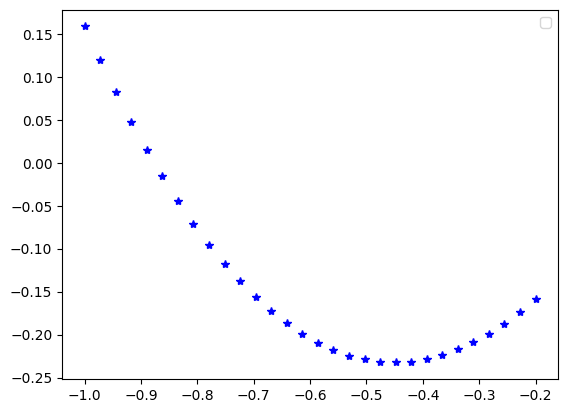

In [7]:
func = lambda x: np.sin(x) + x**2
x = np.linspace(-1, -0.2, 30) # se crea un arreglo con 15 puntos equidistantes de -1, -0.2, que son los que piden
y = func(x)
dataxs, datays = x, y

def computecs(dataxs, datays):
    n = len(dataxs)
    A = np.zeros((n-2,n-2))
    np.fill_diagonal(A, 2*(dataxs[2:]-dataxs[:-2]))
    np.fill_diagonal(A[1:,:], dataxs[2:-1]-dataxs[1:-2])
    np.fill_diagonal(A[:,1:], dataxs[2:-1]-dataxs[1:-2])
    b1 = (datays[2:]-datays[1:-1])/(dataxs[2:]-dataxs[1:-1])
    b2 = (datays[1:-1]-datays[:-2])/(dataxs[1:-1]-dataxs[:-2])
    bs = 6*(b1 - b2)

    cs = np.zeros(n)
    cs[1:-1] = np.linalg.solve(A, bs)
    return cs

def splineinterp(dataxs,datays,cs,x):
    k = np.argmax(dataxs>x)
    xk = dataxs[k]; xk1 = dataxs[k-1]
    yk = datays[k]; yk1 = datays[k-1]
    ck = cs[k]; ck1 = cs[k-1]

    val = yk1*(xk-x)/(xk-xk1) + yk*(x-xk1)/(xk-xk1)
    val -= ck1*((xk-x)*(xk-xk1) - (xk-x)**3/(xk-xk1))/6
    val -= ck*((x-xk1)*(xk-xk1) - (x-xk1)**3/(xk-xk1))/6
    return val

cs = computecs(dataxs, datays)
x_val = 0.95
pofx = splineinterp(dataxs, datays, cs, x)
print(x, pofx, func(x))

#gráfica
plt.plot(x, y, '*b')
plt.legend()
plt.show()

c) Encontrar la raíz de la función interpolada en el intervalo dado.

In [9]:
# Usaré el método de bisección
def biseccion(f, interv, tol, n0):
  a, b = interv
  i = 1
  while (i <= n0):
    p = (a + b)/2
    if (abs(b - a) < tol):
      return p
    if (f(p)*f(a) > 0):
      a = p
    else:
      b = p
    i =+ 1

# Datos
f = lambda x: np.sin(x) + x**2
interv = -1, -0.2
tol = 0.0001
n0 = 200
raiz = biseccion(f, interv, tol, n0)
print(raiz)

-0.876708984375
